## Visualizing Data with Pandas and MatPlotLib


### As a Data Analyst, I want to set up the proper imports so I have access to the Pandas and MatPlotLib libraries

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

### As a Data Analyst, I want to import and store the `ufo_sightings.csv` file in a variable

In [79]:
df = pd.read_csv ("ufo_sightings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64683 entries, 0 to 64682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    64683 non-null  int64  
 1   Date_Time            64683 non-null  object 
 2   City                 64676 non-null  object 
 3   State/Province       59973 non-null  object 
 4   Country              56927 non-null  object 
 5   UFO_Shape            63124 non-null  object 
 6   Length_of_Encounter  64683 non-null  float64
 7   Described_Duration   64683 non-null  object 
 8   Description          64668 non-null  object 
 9   Date_Documented      64683 non-null  object 
 10  Latitude             64683 non-null  float64
 11  Longitude            64683 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 5.9+ MB


### As a Data Analyst, I want to ensure my DataFrame is cleaned by removing any **null** values

In [80]:
nonnull_df = df.dropna ()
nonnull_df.info




<bound method DataFrame.info of            #         Date_Time        City State/Province Country  UFO_Shape   
0          0  10/10/1949 20:30  San Marcos             TX      US   cylinder  \
3          3  10/10/1956 21:00        Edna             TX      US     circle   
4          4  10/10/1960 20:00     Kaneohe             HI      US      light   
5          5  10/10/1961 19:00     Bristol             TN      US     sphere   
7          7  10/10/1965 23:45     Norwalk             CT      US       disk   
...      ...               ...         ...            ...     ...        ...   
64678  65531   8/12/2011 23:15     Yonkers             NY      US      light   
64679  65532   8/12/2011 23:27  Mandeville             LA      US     sphere   
64680  65533   8/12/2012 00:00       Davis             CA      US    unknown   
64681  65534   8/12/2012 00:00      Peoria             IL      US     circle   
64682  65535   8/12/2012 00:15      Barron             WI      US  formation   

       

### As a Data Analyst, I want to filter my DataFrame to remove any information that is not related to my analysis
* This will include **dropping** the **Described_Duration, Description, and Date_Documented** columns

In [81]:
filtered_df = nonnull_df.drop(["Described_Duration","Description","Date_Documented"],axis=1)
filtered_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 53562 entries, 0 to 64682
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    53562 non-null  int64  
 1   Date_Time            53562 non-null  object 
 2   City                 53562 non-null  object 
 3   State/Province       53562 non-null  object 
 4   Country              53562 non-null  object 
 5   UFO_Shape            53562 non-null  object 
 6   Length_of_Encounter  53562 non-null  float64
 7   Latitude             53562 non-null  float64
 8   Longitude            53562 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


### As a Data Analyst, I want to convert the `Date_Time` column to utilize Pandas' DateTime data type

In [82]:
filtered_df["Date_Time"] = pd.to_datetime(filtered_df["Date_Time"])

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53562 entries, 0 to 64682
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   #                    53562 non-null  int64         
 1   Date_Time            53562 non-null  datetime64[ns]
 2   City                 53562 non-null  object        
 3   State/Province       53562 non-null  object        
 4   Country              53562 non-null  object        
 5   UFO_Shape            53562 non-null  object        
 6   Length_of_Encounter  53562 non-null  float64       
 7   Latitude             53562 non-null  float64       
 8   Longitude            53562 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 4.1+ MB


## Data Visualization with Matplotlib

### As a Data Analyst, I want to visualize the **frequency of different UFO shapes**, to determine which UFO shapes are most commonly encountered
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

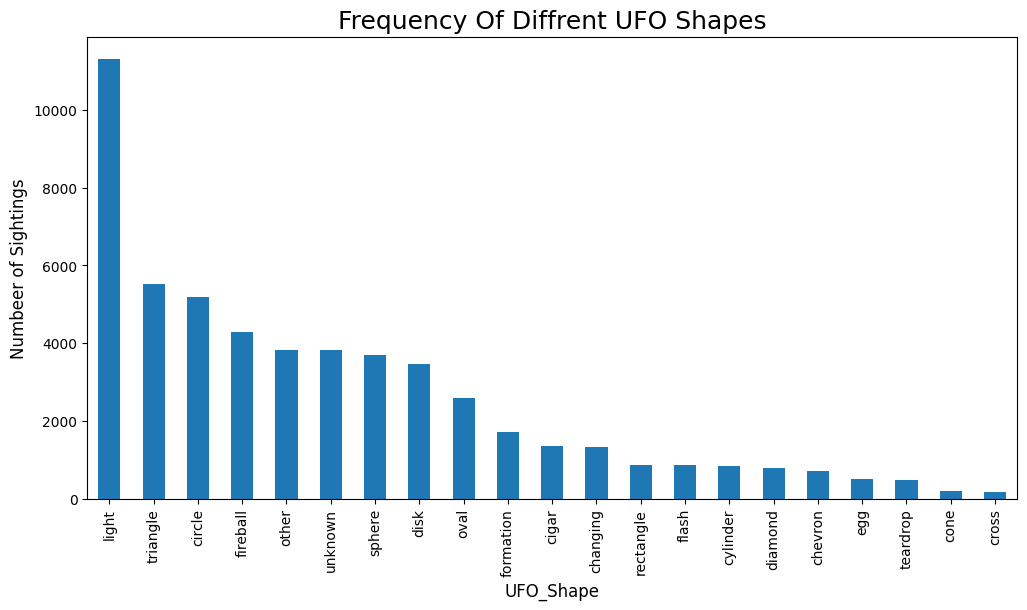

In [83]:
ufo_counts = filtered_df["UFO_Shape"].value_counts()
plt.title("Frequency Of Diffrent UFO Shapes",fontsize=18)

plt.ylabel("Numbeer of Sightings",fontsize=12)
plt.xlabel("UFO Shapes",fontsize=12)
ufo_counts.plot.bar(figsize=(12,6));

### As a Data Analyst, I want to visualize the **number of UFO encounters**, grouped by each decade, to see if there is a correlation between number of sightings and decade
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

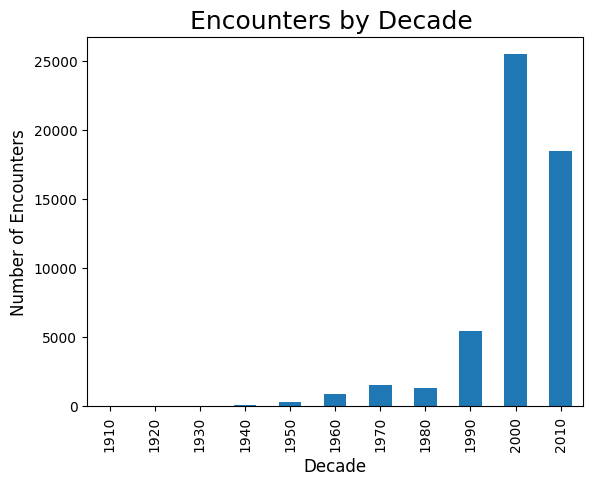

In [93]:
filtered_df["Decade"] = (filtered_df["Date_Time"].dt.year//10) * 10
plt.title("Encounters by Decade ",fontsize=18)
plt.xlabel("Decade",fontsize=12)
plt.ylabel("Number of Encounters",fontsize=12)
filtered_df["Decade"].value_counts().sort_index().plot.bar();


### As a Data Analyst, I want to create a **Line Graph** to visualize the **Frequency of UFO sightings, by hour of the day**
* I will use a **Line Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

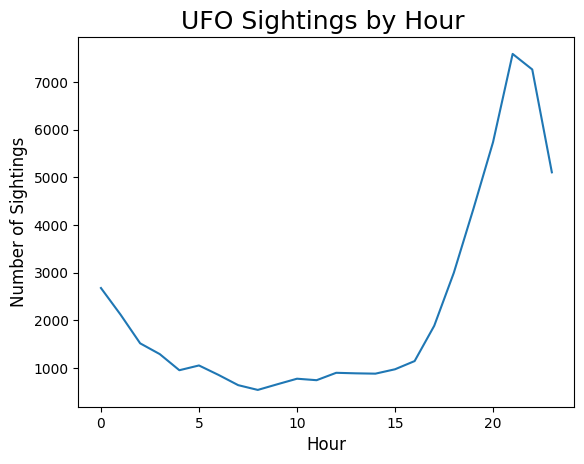

In [100]:
filtered_df["Hour"] = (filtered_df["Date_Time"].dt.hour)
filtered_df.tail()

plt.title("UFO Sightings by Hour ",fontsize=18)
plt.xlabel("Hour",fontsize=12)
plt.ylabel("Number of Sightings",fontsize=12)
filtered_df["Hour"].value_counts().sort_index().plot.line();


### As a Data Analyst, I want to answer all questions in the following Markdown block to provide a **clear and detailed analysis of my UFO sighting findings**

1. Which UFO shape is the most frequently reported? 
    * Q1 Answer : Light

2. Which shape is least frequently reported?
    * Q2 Answer : cross

3. Based on your analysis, what times of the day have the highest number of UFO sightings? 
    * Q3 Answer : between 8-9 pm

4. Are there other factors that may account for this pattern in the data?
    * Q4 Answer : latitude and Longitude

5. Do you see any surprising trends in the breakdown by decade? Do you have any theories or ideas that may explain these patterns?
    * Q5 Answer :More ufo's have been seen most decades as our technology has goten better with a few exceptions

6. Based on your data analysis, what recommendation would you give to individuals interested in encountering a UFO?
    * For example, what time would be best to look, what UFO shapes should they expect to see, etc.
    * Q6 Answer :look for light forms


### **Bonus:** As a Data Analyst, I want to visualize the frequency of **different UFO shape sightings for Virginia, Wisconsin, and Tennessee**, to see if there is any variation of UFO shape frequency between states
* I will use a **Grouped Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart